In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
df = pd.read_csv('C:/Users/dlwnr/a/thesis_code/use.csv', index_col=0)
df

,sad,sex,money,age,school,jobhome,anxiety,sns
0,5,남,하강,46,대학교,경험 있음,비슷하다,0.428571
1,6,여,변호없음,59,대학교,경험 있음,커진다,10.000000
2,6,여,변호없음,67,대학교,일을 안함,커진다,5.000000
3,8,남,하강,63,대학교,경험 없음,커진다,5.000000
4,6,여,하강,37,대학교,경험 없음,비슷하다,7.000000
...,...,...,...,...,...,...,...,...
4995,10,남,해고 및 폐업,24,대학교,경험 있음,줄어든다,10.000000
4996,10,남,하강,20,대학교,일을 안함,커진다,5.000000
4997,6,여,변호없음,28,대학교,경험 있음,비슷하다,0.142857
4998,1,여,변호없음,51,대학교,경험 있음,커진다,3.000000


In [4]:
df['money'].value_counts()

변호없음       3704
하강         1034
해고 및 폐업     144
상승          118
Name: money, dtype: int64

In [5]:
stable = df[df['money']=='변호없음']
down = df[df['money']=='하강']
out = df[df['money']=='해고 및 폐업']
up = df[df['money']=='상승']

In [10]:
stable['sad'].describe()

count    3704.000000
mean        5.140389
std         2.275336
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: sad, dtype: float64

In [11]:
down['sad'].describe()

count    1034.000000
mean        5.865571
std         2.069067
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: sad, dtype: float64

In [13]:
out['sad'].describe()

count    144.000000
mean       5.659722
std        2.525847
min        0.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: sad, dtype: float64

In [14]:
up['sad'].describe()

count    118.000000
mean       5.169492
std        2.133594
min        0.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: sad, dtype: float64

['NanumGothic']


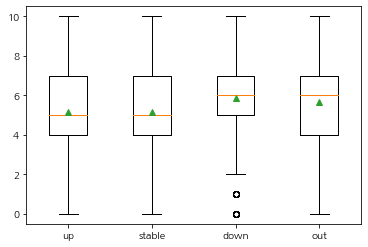

In [15]:
import matplotlib.pyplot as plt


# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.


plt.boxplot([up['sad'], stable['sad'], down['sad'],out['sad']],
    labels=['up', 'stable', 'down','out'], showmeans=True)
plt.show()

In [16]:
from scipy.stats import  shapiro

#정규성

print(shapiro(up['sad']))

print(shapiro(stable['sad']))

print(shapiro(down['sad']))
print(shapiro(out['sad']))





ShapiroResult(statistic=0.9551854729652405, pvalue=0.0005984770250506699)
ShapiroResult(statistic=0.9490852952003479, pvalue=4.883364446815683e-34)
ShapiroResult(statistic=0.9468091726303101, pvalue=7.687401471797914e-19)
ShapiroResult(statistic=0.9595832824707031, pvalue=0.0003094856219831854)


In [17]:
#등분산성(levene)
from scipy.stats import  levene

levene(up['sad'],stable['sad'], down['sad'],out['sad'])

LeveneResult(statistic=8.495961364306766, pvalue=1.2578859901833684e-05)

In [19]:
#등분산성(bartlett)
from scipy.stats import  bartlett

bartlett(up['sad'],down['sad'],out['sad'],stable['sad'])

BartlettResult(statistic=19.16290245401887, pvalue=0.00025299250421302756)

welch-anova(이분산성이므로)

In [21]:
import pingouin as pg

pg.welch_anova(dv = 'sad', between = 'money', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,money,3,325.184793,32.571207,1.960995e-18,0.017484


사후분석(아노바 결과 차이가 있다 나왔으므로)

In [25]:
post=pg.pairwise_gameshowell(dv = 'sad', between = 'money', data = df)
post

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,변호없음,상승,5.140389,5.169492,-0.029103,0.199940,-0.145558,125.626390,9.988948e-01,-0.013609
1,변호없음,하강,5.140389,5.865571,-0.725182,0.074418,-9.744753,1791.243821,4.926060e-13,-0.342692
2,변호없음,해고 및 폐업,5.140389,5.659722,-0.519333,0.213782,-2.429270,152.159129,7.590171e-02,-0.206297
3,상승,하강,5.169492,5.865571,-0.696079,0.206684,-3.367836,143.273945,5.323276e-03,-0.327034
4,상승,해고 및 폐업,5.169492,5.659722,-0.490231,0.287894,-1.702816,259.749387,3.242786e-01,-0.210834
5,하강,해고 및 폐업,5.865571,5.659722,0.205848,0.220103,0.935238,170.768910,7.859508e-01,0.083134


In [26]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df.sad, df.money)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
변호없음,상승,-0.137,0.891,1.0,False
변호없음,하강,-9.2375,0.0,0.0,True
변호없음,해고 및 폐업,-2.6757,0.0075,0.0449,True
상승,하강,-3.4512,0.0006,0.0035,True
상승,해고 및 폐업,-1.6747,0.0952,0.5712,False
하강,해고 및 폐업,1.0866,0.2774,1.0,False


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df['sad'], df['money'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
변호없음,상승,0.0291,0.999,-0.5089,0.5671,False
변호없음,하강,0.7252,-0.0,0.5228,0.9275,True
변호없음,해고 및 폐업,0.5193,0.0321,0.0307,1.008,True
상승,하강,0.6961,0.0076,0.1371,1.2551,True
상승,해고 및 폐업,0.4902,0.2912,-0.2242,1.2046,False
하강,해고 및 폐업,-0.2058,0.7296,-0.7176,0.3059,False


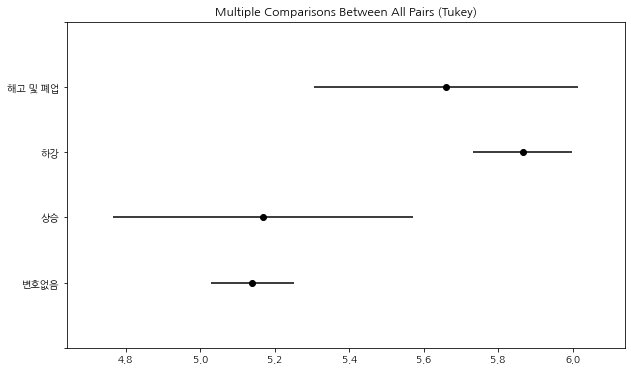

In [30]:
fig = hsd.plot_simultaneous()
plt.show()

회귀모형

In [29]:

import statsmodels.formula.api as sm 


model = sm.ols(formula = 'sad ~ money',data=df).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sad   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     29.64
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           5.51e-19
Time:                        11:25:37   Log-Likelihood:                -11122.
No. Observations:                5000   AIC:                         2.225e+04
Df Residuals:                    4996   BIC:                         2.228e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.1404      0.037    139.746      0.000       5.068       5.213
money[T.상승]          0.0291      0.209      0.139      0.889      -0.381       0.440
money[T.하강]          0.7252      0.079      9.210      0.000       0.571       0.880
money[T.해고 및 폐업]     0.5193      0.190      2.731      0.006       0.147       0.892
==============================================================================
Omnibus:                      213.213   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.596
Skew:                          -0.510   Prob(JB):                     5.12e-51
Kurtosis:                       2.736   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""